## Final Project Submission

Please fill out:
* Student name: Elizabeth Barongo Omao
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samuel Jane/Evelyne Asiko
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#Business Problem -  Zamani Real Estate have been contracted by different property owners to assist them in selling their houses. They have given me past data of houses sold which i will use to create a model that predicts the price of a house that is to be put on sale. Also, they intend to use this data to advise developers on houses that attract higher prices.


In [2]:
#Data
#I picked my data, kc_house_data as I wanted to analyze the problem using profit and other variables that are common in most houses such as bedrooms, number of bathrooms and the size of the living room. 
#The variable profit is determined by the other variables which  the model would use to predict other house prices. 



In [3]:
#Methods 
#For me to use my data, I had to to clean my data by removing any uneccesary information.
#For variables that had no data, I filled them accordingly.
#I used standardization/normalization on features of my dataset
#Performed log transformations on different features of my dataset
#Used statsmodels to fit a multiple linear regression model
#Evaluated the linear regression model by using statistical performance metrics pertaining to overall model and specific parameters

In [4]:
#We import necessary liabraries and our data and check its composition
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# The dataset contains a mix of continuous and categorical data
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape


(21597, 21)

In [8]:
#we drop the uneccessary columns
data = df.drop(["date", "view", "sqft_above", "sqft_basement", "zipcode", "lat", "long"], axis=1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,1800,7503


In [9]:
data = data.drop(["sqft_living15", "sqft_lot15"], axis=1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [10]:
#we check for any missing values
data.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64

In [11]:
data = data.drop(["yr_renovated"], axis=1)
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [12]:
data["waterfront"]

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [13]:
#since most houses have no waterfront, we fill zero to the missing values
data["waterfront"] == 0

0        False
1         True
2         True
3         True
4         True
         ...  
21592     True
21593     True
21594     True
21595    False
21596     True
Name: waterfront, Length: 21597, dtype: bool

In [14]:
data["waterfront"].fillna("0.0", inplace=True)

In [16]:
data.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [17]:

import numpy as np


continuous = ['price', 'sqft_lot', 'yr_built', 'id', 'floors']
categoricals = ['bedrooms', 'bathrooms', 'waterfront', 'grade', 'condition']

In [18]:
# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

In [19]:
data_ohe = pd.get_dummies(data[categoricals], drop_first=True)

In [20]:
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_lot_log,yr_built_log,id_log,floors_log,bedrooms,bathrooms,grade,condition,waterfront_1.0,waterfront_0.0
0,-1.401998,-0.388430,-0.537409,0.778747,-0.960852,3,1.00,7,3,0,1
1,0.279938,-0.113241,-0.674325,0.670224,1.006831,3,2.25,7,3,0,0
2,-1.799430,0.244475,-1.293945,0.536643,-0.960852,2,1.00,6,3,0,0
3,0.499698,-0.523914,-0.196338,-0.302291,-0.960852,4,3.00,7,5,0,0
4,0.178434,0.008139,0.547946,-0.549771,-0.960852,3,2.00,8,3,0,0


In [21]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price_log       21597 non-null  float64
 1   sqft_lot_log    21597 non-null  float64
 2   yr_built_log    21597 non-null  float64
 3   id_log          21597 non-null  float64
 4   floors_log      21597 non-null  float64
 5   bedrooms        21597 non-null  int64  
 6   bathrooms       21597 non-null  float64
 7   grade           21597 non-null  int64  
 8   condition       21597 non-null  int64  
 9   waterfront_1.0  21597 non-null  uint8  
 10  waterfront_0.0  21597 non-null  uint8  
dtypes: float64(6), int64(3), uint8(2)
memory usage: 1.5 MB


In [22]:
#Run a linear model with price as the target variable in statsmodels
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [23]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3494.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:21:05   Log-Likelihood:                -20249.
No. Observations:               21597   AIC:                         4.052e+04
Df Residuals:                   21586   BIC:                         4.061e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.3998      0.042   -127.885      0.000      -5.483      -5.317
sqft_lot_log      -0.0147      0.005     -3.150      0.002      -0.024      -0.006
yr_built_log      -0.3511      0.005    -64.803      0.000      -0.362      -0.340
id_log            -0.0038      0.004     -0.904      0.366      -0.012       0.004
floors_log         0.0543      0.006      9.773      0.000       0.043       0.065
bedrooms           0.0256      0.005      4.706      0.000       0.015       0.036
bathrooms          0.3241      0.009     36.975      0.000       0.307       0.341
grade              0.5660      0.005    111.142      0.000       0.556       0.576
condition          0.0839      0.007     11.929      0.000       0.070       0.098
waterfront_1.0     1.1027      0.052     21.265      0.000       1.001       1.204
waterfront_0.0     0.0012      0.013      0.089      0.929      -0.025       0.028
==============================================================================
Omnibus:                       79.752   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.695
Skew:                          -0.027   Prob(JB):                     6.78e-24
Kurtosis:                       3.340   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Run the same model in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [25]:
LinearRegression()

LinearRegression()

In [26]:
# coefficients
linreg.coef_

array([-0.01471715, -0.3510747 , -0.00384332,  0.05429683,  0.02555483,
        0.32412977,  0.56595929,  0.08393064,  1.10271001,  0.00119378])

In [27]:
# intercept
linreg.intercept_

-5.3998469069986035

In [28]:
# getting the used column names for the df

continuous.remove("price")
used_cols = [*continuous, *categoricals]
used_cols

['sqft_lot',
 'yr_built',
 'id',
 'floors',
 'bedrooms',
 'bathrooms',
 'waterfront',
 'grade',
 'condition']

In [29]:
# creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [30]:
new_row = new_row.reset_index(drop=False)

In [31]:
df2={'sqft_lot':9220,'yr_built': 2000,'id': 2022,'sqft_lot':9220,'floors' : 5,'bedrooms': '3','bathrooms':'2', 'waterfront':'0.0','grade':'6','condition': '5'}

In [32]:
# adding the details provided into the empty dataframe
new_row = new_row.append(df2, ignore_index=True)
new_row

C:\Users\BARONGO\AppData\Local\Temp\ipykernel_6556\2689368694.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = new_row.append(df2, ignore_index=True)


,index,sqft_lot,yr_built,id,floors,bedrooms,bathrooms,waterfront,grade,condition
0,NaN,9220,2000,2022,5,3,2,0.0,6,5


In [34]:
new_row = new_row.drop(["index"], axis=1)
new_row

,sqft_lot,yr_built,id,floors,bedrooms,bathrooms,waterfront,grade,condition
0,9220,2000,2022,5,3,2,0.0,6,5


In [35]:
#Predict the house price given the new row
# first we'll tackle the continuous columns
new_row_cont = new_row[continuous]

# log features
log_names = [f'{column}_log' for column in new_row_cont.columns]

new_row_log = np.log(new_row_cont.astype(float)) # won't work unless float
new_row_log.columns = log_names

# normalizing
for col in continuous:
    # normalize using mean and std from overall dataset
    new_row_log[f'{col}_log'] = (new_row_log[f'{col}_log'] - data[col].mean()) / data[col].std()
new_row_log

,sqft_lot_log,yr_built_log,id_log,floors_log
0,-0.364388,-66.838574,-1.592247,0.213721


In [36]:
# now time for the categoricals
new_row_cat = new_row[categoricals]

new_row_ohe = pd.DataFrame(columns = data_ohe.columns)

# using complicated for loops to ohe the new row
ohe_dict = {}
for col_type in new_row_cat.columns:
    col_list = [c for c in new_row_ohe.columns.to_list() if col_type in c]
    for x in col_list:
        if new_row_cat[col_type][0] in x:
            ohe_dict[x] = 1
        else:
            ohe_dict[x] = 0
            

new_row_ohe 

,bedrooms,bathrooms,grade,condition,waterfront_1.0,waterfront_0.0


In [37]:
new_row_ohe = new_row_ohe.reset_index(drop=False)

In [38]:
# putting the results in a dataframe
new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)
new_row_ohe

C:\Users\BARONGO\AppData\Local\Temp\ipykernel_6556\96605749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)


,index,bedrooms,bathrooms,grade,condition,waterfront_1.0,waterfront_0.0
0,NaN,0,0,0,0,0,1


In [40]:
new_row_ohe = new_row_ohe.drop(["index"], axis=1)
new_row_ohe

,bedrooms,bathrooms,grade,condition,waterfront_1.0,waterfront_0.0
0,0,0,0,0,0,1


In [41]:

new_row_processed = pd.concat([new_row_log, new_row_ohe], axis=1)
new_row_processed

,sqft_lot_log,yr_built_log,id_log,floors_log,bedrooms,bathrooms,grade,condition,waterfront_1.0,waterfront_0.0
0,-0.364388,-66.838574,-1.592247,0.213721,0,0,0,0,0,1


In [42]:
new_row_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sqft_lot_log    1 non-null      float64
 1   yr_built_log    1 non-null      float64
 2   id_log          1 non-null      float64
 3   floors_log      1 non-null      float64
 4   bedrooms        1 non-null      object 
 5   bathrooms       1 non-null      object 
 6   grade           1 non-null      object 
 7   condition       1 non-null      object 
 8   waterfront_1.0  1 non-null      object 
 9   waterfront_0.0  1 non-null      object 
dtypes: float64(4), object(6)
memory usage: 208.0+ bytes


In [43]:
new_row_processed.isna().sum()

sqft_lot_log      0
yr_built_log      0
id_log            0
floors_log        0
bedrooms          0
bathrooms         0
grade             0
condition         0
waterfront_1.0    0
waterfront_0.0    0
dtype: int64

In [44]:
new_row_pred_log = linreg.predict(new_row_processed)
new_row_pred_log

array([18.08976579])

In [45]:
# prediction needs to be scaled and exponentiated
np.exp(new_row_pred_log) * data["price"].std() + data["price"].mean()

array([2.63868142e+13])

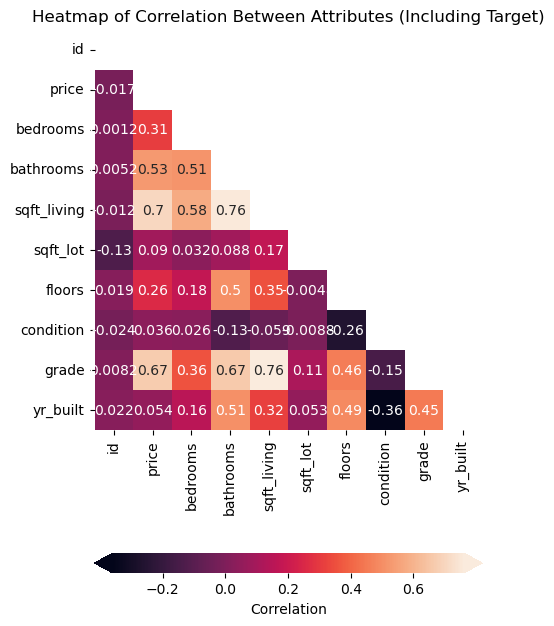

In [46]:
#DATA VISUALIZATION
import numpy as np
import seaborn as sns
# Create a df with the target as the first column,
# then compute the correlation matrix

corr = data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [47]:
most_correlated_feature = "sqft_living"

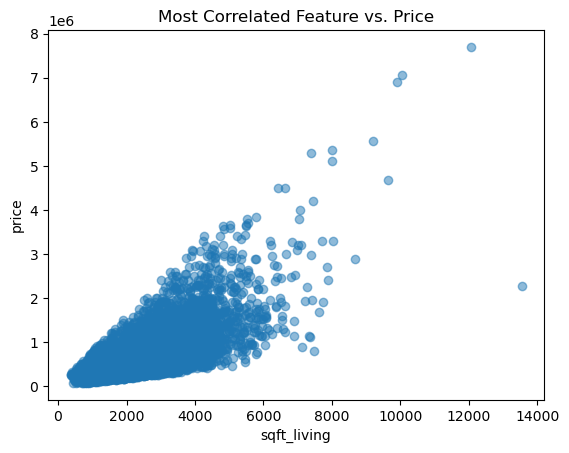

In [48]:
fig, ax = plt.subplots()

ax.scatter(data["sqft_living"],data["price"], alpha=0.5)
ax.set_xlabel("sqft_living")
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Price");

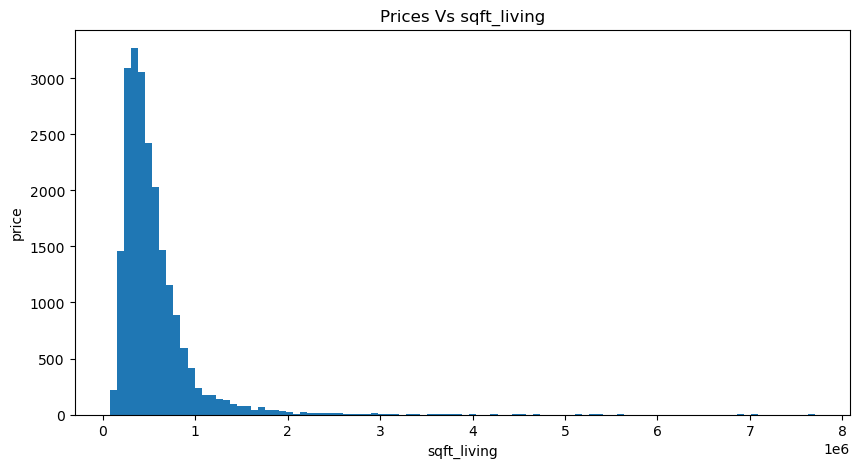

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data["price"], bins=100)

ax.set_xlabel("sqft_living")
ax.set_ylabel("price")
ax.set_title("Prices Vs sqft_living");

In [50]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [51]:

from sklearn.model_selection import cross_validate, ShuffleSplit

data_numeric = data.select_dtypes("number").copy()

data_numeric

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,3,8,2004


IndexError: index 2 is out of bounds for axis 0 with size 2

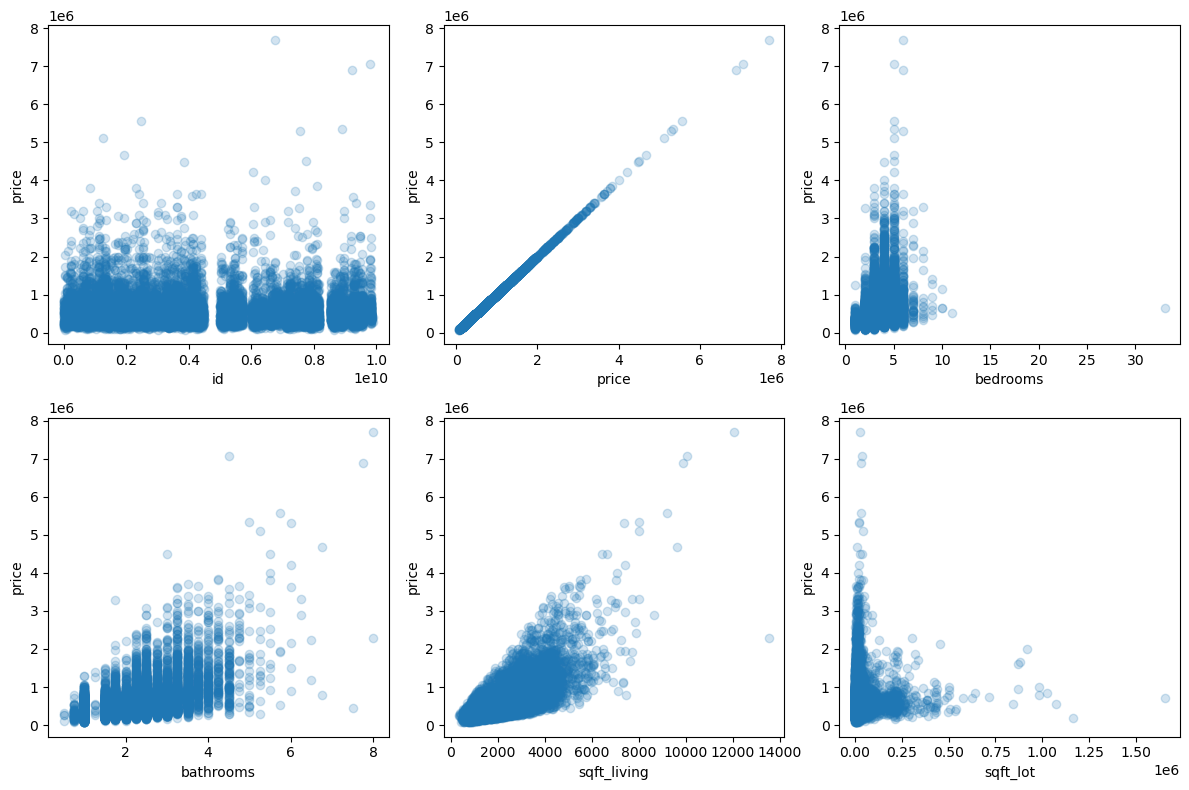

In [52]:
scatterplot_data = data_numeric

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(data_numeric[col],data_numeric["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

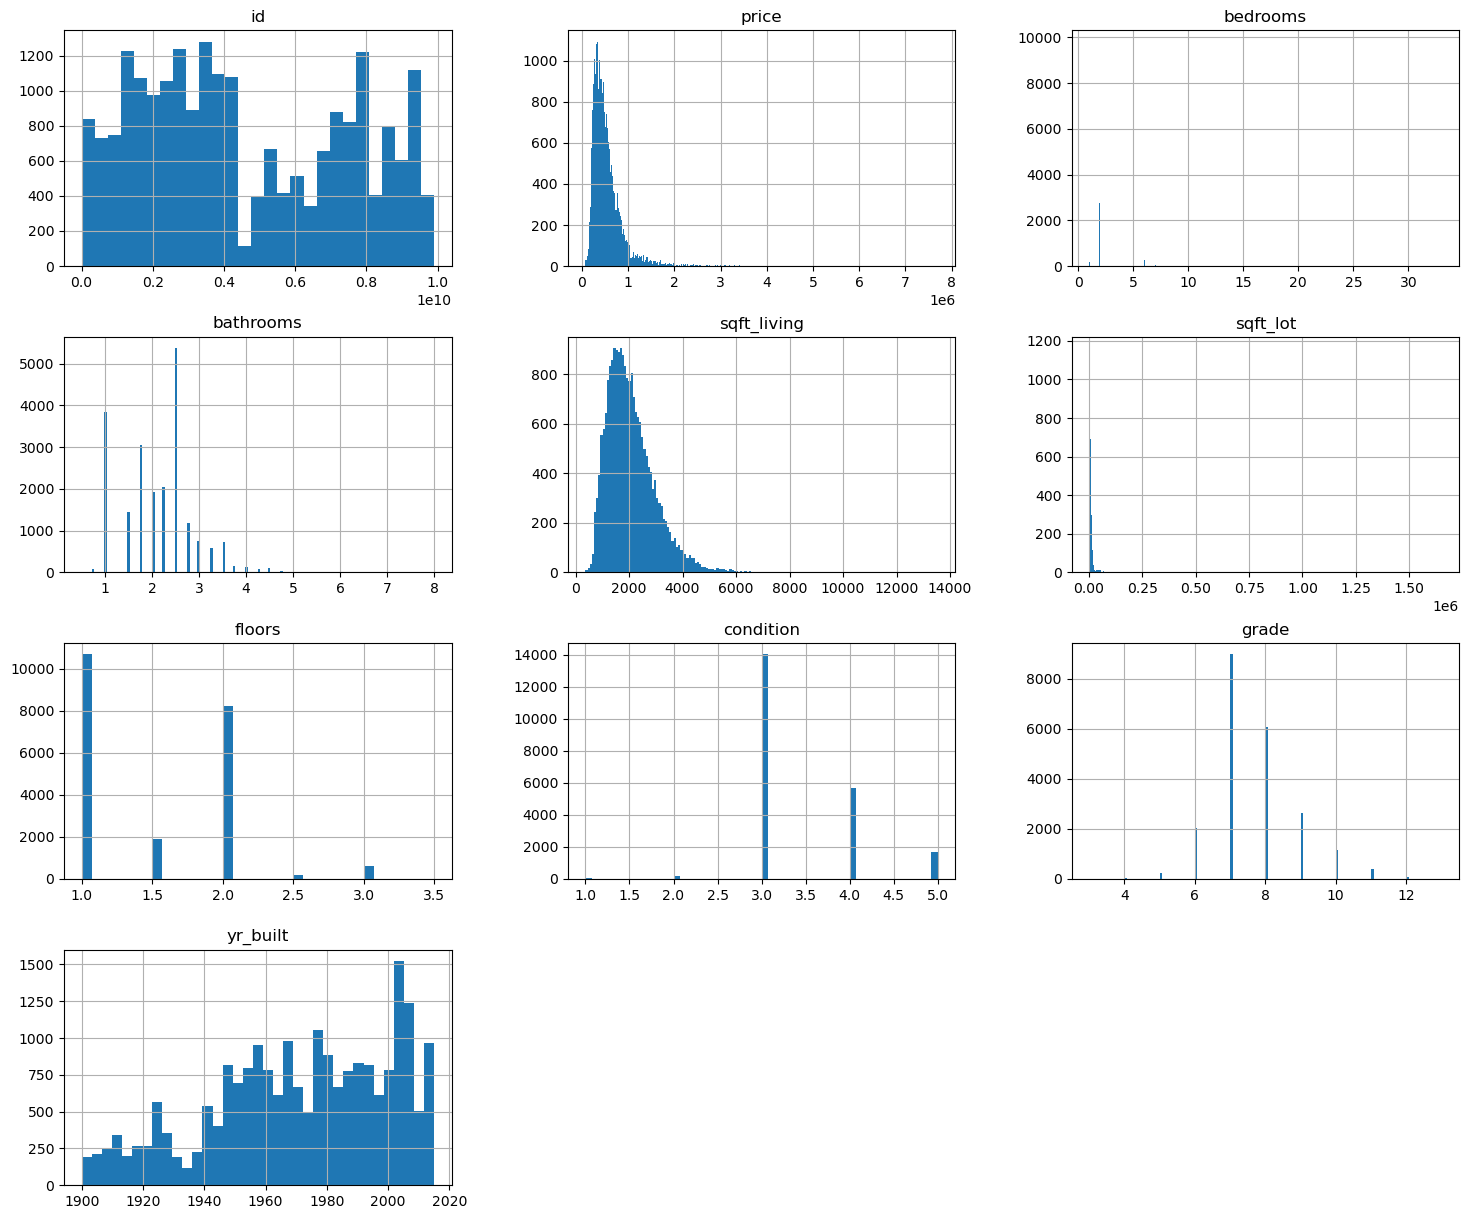

In [55]:
#Create histograms for all variables in the dataset
data.hist(figsize=(18,15), bins='auto');

In [56]:
# observations here 

# yr_built is continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values


In [57]:
#Conclusion
#From the data, sqft_living is the most correlated variable with price followed by grade and bathrooms.
 #For a developer, they can maximize on the variables while building a new house in order to sell at a higher price.
